### Logistic Regression - תרגיל מסכם

### יבאו את החבילות matplotlib, seaborn, pandas, sklearn והוסיפו את השורה שגורמת לגרפים להופיע ב jupyter

### בתרגיל זה נעבוד על מאגר מידע של מחלות לב. 

### כל רשומה במאגר המידע היא בן אדם, וכל עמודה היא מאפיין שלו.

### העמודה האחרונה היא בינארית, ואומרת האם לבן אדם יש מחלת לב או לא.

### אנחנו נבנה מודל של logistic regression על מנת לחזות לאיזה מהאנשים יש מחלת לב ולאיזה לא.

### את מאגר המידע תוכלו למצוא בתיקייה notebooks/logistic regression או להוריד מהאתר קאגל בכתובת:  https://www.kaggle.com/ronitf/heart-disease-uci

### טען את המידע ל DataFrame

In [2]:
df = 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### המידע מורכב מהשדות הבאים:

* age - גיל.
* sex - מין - גבר: 1, אישה: 0.
* cp - סוג הכאב בחזה.
* trestbps - לחץ דם במנוחה.
* chol - כולסטרול.
* fbs - רמת סוכר בדם - מתחת ל120: 0, מעל 120: 1.
* restecg - תוצאת בדיקה אלקטוגרפית
* thalach - דופק לב מקסומלי.
* exang - אנגינה: לא: 0, כן: 1.
* oldpeak - פי כמה עולה מדד אנטי דיכאוני לאחר התעמלות.
* slope - השיפוע של גרף ה oldpeak.
* ca - מספר העורקים שמחוברים ללב.
* thal - האם הייתה בעיה באחד העורקים בעבר, ואיזה סוג.
* target - האם יש מחלה. כן: 1, לא: 0.

### אל תדאגו אם אתם לא מבינים את כל השדות פה, גם אני לא.

### אבל זה היופי של משין לרנינג. מספיק לנו להשתמש בערכים שנמדדו כדי להסיק מסקנות מעניינות, שבמקרים מסויימים אפילו מגיעות לרמות דיוק גבוהות יותר משל מומחים בתחום.

### Data visualization

### תיצרו countplot שיראה את כמות האנשים עם מחלה ומספר האנשים בלי.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

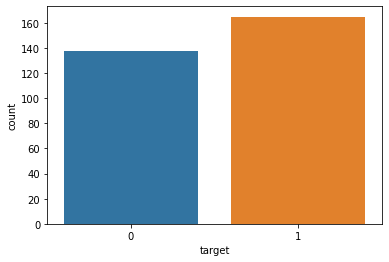

### תיצרו countplot שיראה כמה גברים וכמה נשים יש במאגר.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '0: woman, 1: man')

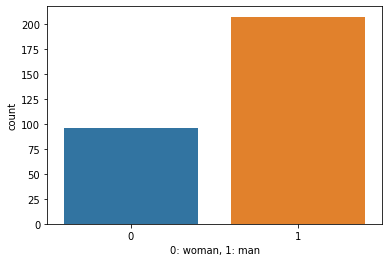

### הראו, בעזרת groupby מהם הערכים הממוצעים של כל השדות המספריים עבור חולים ומה הממוצע עבור הלא חולים

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


## עד עכשיו ראינו:

* יש יותר חולים מלא חולים
* יש יותר גברים מנשים
* דווקא הגיל הממוצע של החולים נמוך יותר
* לנשים יש סיכון גבוה יותר לחלות - הממוצע של מאפיין Sex עבור חולים קרוב יותר ל 0 (נשים)
* יש הפרשים גדולים בין חולים ללא חולים עבור השדות: ca, exang, cp, oldpeak

אם חלק מהשדות נראים לכם מוזרים, תמיד תזכרו שאנחנו עובדים עם מידע שמישהו אסף. אולי במדינה אחרת, אולי עבור אוכלוסיות בעלי מאפיינים מסויימים, ואולי גם הוא עשה טעויות. לי למשל מאוד מוזר שגיל החולים נמוך יותר בממוצע מגיל הבריאים. אם הייתי בונה מודל כדי למכור לבתי חולים, הייתי בודק מאגרי מידע נוספים, אבל כרגע, בשביל התרגול זה לא משנה לנו.

### נבדוק אם יש לנו מידע חסר

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### אין לנו בכלל מידע חסר (ה count שלנו מלא עבור כל המאפיינים). מאוד נדיר! 

### אם היה מידע חסר, היינו צריכים להחליט כיצד למלא אותו. למזלנו אין, אז נמשיך להסתכל על המידע.

### נסתכל על פרמטר cp

In [7]:
df.cp.describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

### תבדקו כמה פעמים מופיע כל ערך של cp

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

### תיצרו barplot שמראה את הסיכוי שלבן אדם יש מחלה, לפי ערך ה cp שלו

<AxesSubplot:xlabel='cp', ylabel='target'>

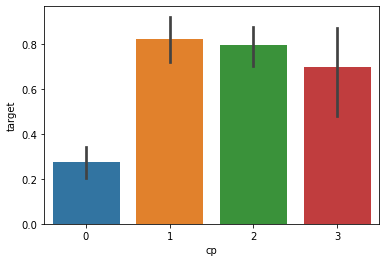

### תיצרו countplot כמו הקודם, רק שעכשיו תוסיפו את הפרדה בין חולים לבריאים

<AxesSubplot:xlabel='cp', ylabel='count'>

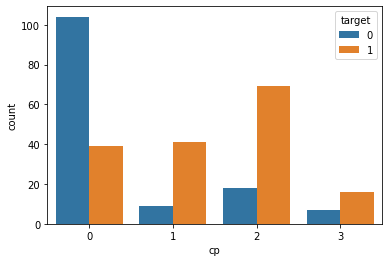

### אנחנו רואים שעבור cp=0 כמעט ואין חולים, ועבור כל שאר הערכים כמעט ואין בריאים. זהו מאפיין מפתח!

### נסתכל על הפרמטר ca

In [17]:
df.ca

0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    2
301    1
302    1
Name: ca, Length: 303, dtype: int64

In [18]:
df.ca.describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

### תבדקו כמה פעמים מופיע כל ערך של ca

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

### יש לנו 5 ערכים אפשריים. מתוכם יותר מחצי הם 0.
### תיצרו barplot שמראה את הסיכוי שלבן אדם יש מחלה, לפי ערך ה ca שלו

<AxesSubplot:xlabel='ca', ylabel='target'>

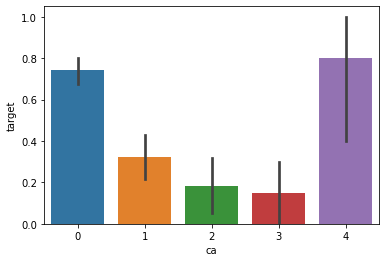

### תיצרו countplot שסופר לכמה אנשים יש כל ערך של ca, ותוסיפו הפרדה לפי למי יש מחלה ולמי אין

<AxesSubplot:xlabel='ca', ylabel='count'>

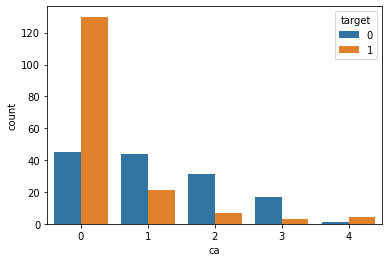

### גם זה מאפיין מפתח. 0 ו 4 הם סממן רציני למחלה, בעוד 1, 2, 3 הם סממנים רציניים לבריאות.

### שימו לב שלא סתם שני המאפיינים הראשונים שבחרנו יצאו משמעותיים. לקחנו את המאפיינים שהראו את חשיבותם לפי פונקציית ה ()groupby

### עכשיו, בואו נעבור לאימון מודל של Logistic Regression

### נחלק את המידע ל train, test

### יבאו את הפונקציה train_test_split של sklearn

### ניצור את רשימת השדות שאיתם האלגוריתם ילמד

In [25]:

features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

### נחלק את המידע ל train, test. 

### נשתמש בrandom_state זהה כדי כולנו נקבל את אותה חלוקה. תהליך החלוקה הוא רנדומי אם לא מציינים random_state
### תיצרו את X, Y, וחלקו אותם ל X_train, Y_train, X_test, Y_test עם random_state=42 ו test_size=0.2

In [26]:

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [27]:
Y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

### תיצרו אובייקט LogisticRegression של sklearn.linear_model

In [29]:
from sklearn.linear_model import LogisticRegression


### תאמנו את המודל על ה train 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### תיצרו את התחזיות של המודל עבור ה test

In [31]:
Y_pred = 
Y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### חשבו את ה confusion matrix בעזרת sklearn.metrics.confusion_matrix

In [33]:
from sklearn.metrics import confusion_matrix
conf_mat = 
conf_mat

array([[25,  4],
       [ 3, 29]], dtype=int64)

* 25 בריאים אובחנו כבריאים.
* 29 חולים אובחנו כחולים.
* 3 חולים אובחנו כבריאים.
* 4 בריאים אובחנו כחולים.

### חשבו את הדיוק ואת ה recall

In [34]:
tp = 25
tn = 29
fp = 4
fn = 3

percision = 
recall = 

print(f'percision is %{percision}, recall is %{recall}')

percision is %0.8852459016393442, recall is %0.8928571428571429


### כל הכבוד! נתראה בפרק הבא, בו נלמד על אלגוריתם K-Nearest Neighbors (KNN)